In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Handwritten Digit Recognition /Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Handwritten Digit Recognition /Dataset/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#list of all digits that are going to be predicted
np.sort(train.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#define the number of samples for training set and for validation set
num_train, num_validation = int(len(train)*0.8),int(len(train)*0.2)

In [9]:
num_train, num_validation

(33600, 8400)

In [10]:
#generate training data from train_file
x_train, y_train = train.iloc[:num_train,1:].values,train.iloc[:num_train,0].values

In [11]:
x_validation,y_validation = train.iloc[num_train:,1:].values,train.iloc[num_train:,0].values

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [13]:
def drawImg(sample):               
    img=sample.reshape((28,28))    
    plt.imshow(img,cmap='gray')
    plt.show()

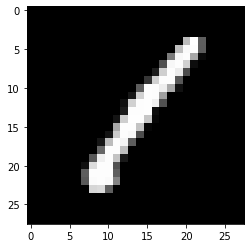

1


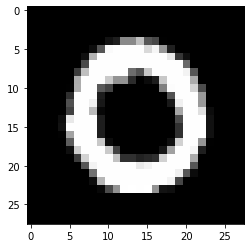

0


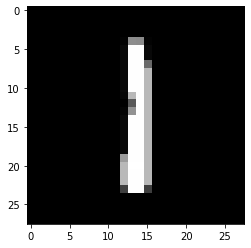

1


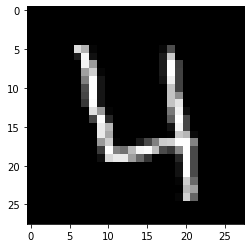

4


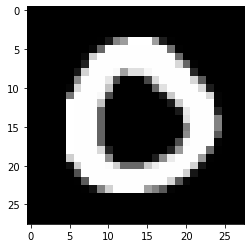

0


In [15]:
i=0
while i<5:
  drawImg(x_train[i])
  print(y_train[i])
  i+=1

In [16]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [18]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9638095238095238


In [21]:
conf_matrix = confusion_matrix(y_validation, prediction_validation)
print("Validation Confusion Matrix: \n" + str(conf_matrix))

Validation Confusion Matrix: 
[[835   0   0   0   0   0   9   0   7   1]
 [  0 936   3   3   1   2   0   2   3   0]
 [  5   0 775   3   2   1   2   4   6   3]
 [  2   2  15 832   2   8   1   5  11   4]
 [  1   2   0   0 783   0   6   0   5  14]
 [  4   1   2  11   2 709   6   0   7   5]
 [  3   2   0   0   1   4 819   0   2   0]
 [  0   2   6   2   2   0   0 858   2  12]
 [  2  10   4   2   4   4   5   1 763   7]
 [  5   4   5  11   9   3   0  12   5 786]]


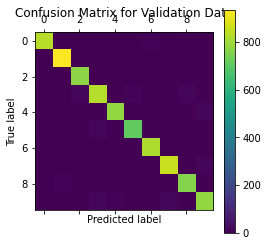

In [23]:
plt.matshow(conf_matrix)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()